<a href="https://colab.research.google.com/github/ssingh1187/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project_week_Final_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Download business data
import pandas as pd
df_business = pd.read_json('/Users/shilpasingh/Downloads/yelp_dataset/business.json', lines=True)

# Filtering only food restaurants based on categories and are open
food_data = df_business[df_business['categories'].str.contains('food') & df_business['is_open'] == 1]
food_df = pd.DataFrame(food_data)

# Dropping unwanted columns
food_df = food_df.drop(['address','attributes','hours','latitude',
                        'longitude','postal_code','is_open','categories'], 
                       axis=1)
food_df = food_df.rename(columns={'stars':'avg_rating'})
food_df.head()

,business_id,city,name,review_count,avg_rating,state
1,QXAEGFB4oINsVuTFxEYKFQ,Mississauga,Emerald Chinese Restaurant,128,2.5,ON
162,nsNONDHbV7Vudqh21uicqw,Scottsdale,Salt Cellar,526,3.5,AZ
409,UdL8Z06DaNj6qhen0fEH9A,Phoenix,Mariscos El Dorado Sin,7,2.0,AZ
507,QS3QxI7u5PRdtbGgI0-UsA,Scottsdale,Sakana Sushi & Grill,347,4.0,AZ
715,QSGerT1enEKlvJnYkwthHQ,Avondale,Claim Jumper Restaurant & Saloon,236,2.5,AZ


In [0]:
# 100k random samples of reviews
review_df = pd.read_csv('/Users/shilpasingh/Downloads/review_100k.csv')
review_df.shape

# Selecting only the reviews of food joints
result_df = pd.merge(food_df,review_df, how='inner', on=['business_id'])
#result_df = result_df.drop(['categories','is_open','date'], axis=1)
result_df.head(1)

,business_id,city,name,review_count,avg_rating,state,text,date,cool,funny,stars,useful,user_id,review_id
0,QXAEGFB4oINsVuTFxEYKFQ,Mississauga,Emerald Chinese Restaurant,128,2.5,ON,"Looking over the reviews, Emerald has mixed ra...",2013-11-26 16:02:22 UTC,3,3,4,7,dWq7yqls-hd8_BRjAeQQ6A,IMyKZvA5IU5W_N6e5EFhaQ


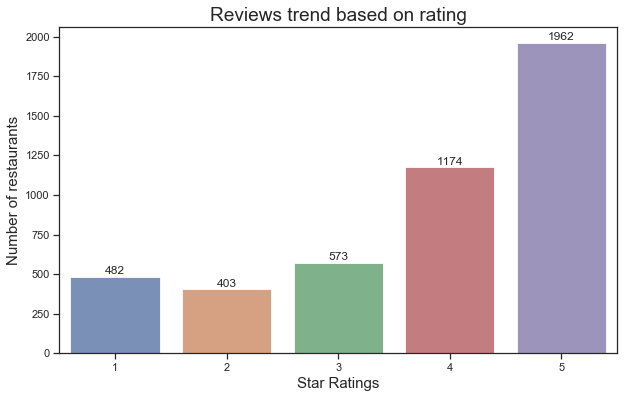

In [0]:
# Get the distribution of the ratings
x=result_df['stars'].value_counts()
x=x.sort_index()
# plot
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Reviews trend based on rating", fontsize=19)
plt.ylabel('Number of restaurants', fontsize=15)
plt.xlabel('Star Ratings', fontsize=15)

# adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

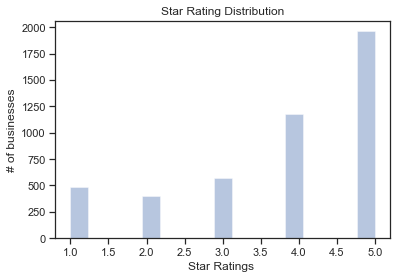

In [0]:
import seaborn as sns

food_reviews = result_df[['name','state','review_count','avg_rating','stars','text']]
food_reviews.head(1)


sns.distplot(food_reviews.stars, kde=False)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12);

# The plot shows that people mostly write the reviews when they rate 4 and higher.

In [0]:
result_df.shape

(4594, 14)

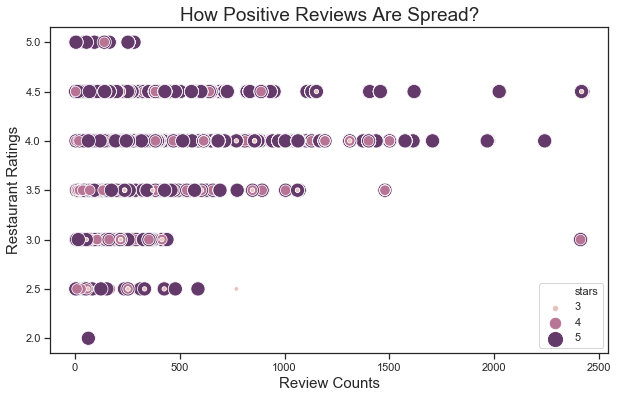

In [0]:
# filtering positive reviews
reviews_pos = food_reviews[(food_reviews['stars'] >= 3) & (food_reviews['stars'] <= 5)]
reviews_pos.shape

plt.figure(figsize=(10,6))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="review_count",  
                     y="avg_rating",
                    hue="stars", size="stars",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=reviews_pos)


plt.title("How Positive Reviews Are Spread?", fontsize=19)
plt.ylabel('Restaurant Ratings', fontsize=15)
plt.xlabel('Review Counts', fontsize=15);

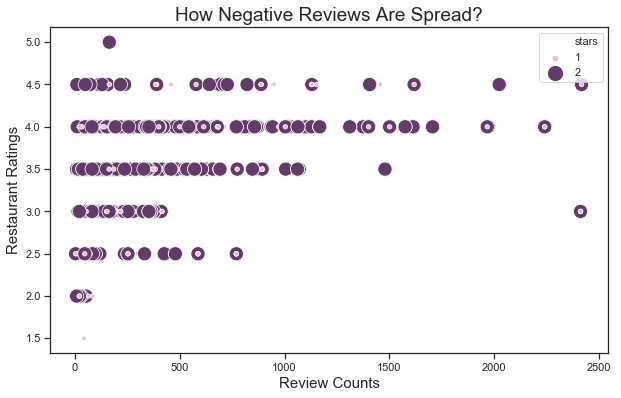

In [0]:
# filtering negative reviews
reviews_neg = food_reviews[(food_reviews['stars'] >= 1) & (food_reviews['stars'] < 3)]
reviews_neg.shape


plt.figure(figsize=(10,6))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="review_count",  
                     y="avg_rating",
                    hue="stars", size="stars",
                     sizes=(20, 200), palette=cmap,
                     legend="full", data=reviews_neg)


plt.title("How Negative Reviews Are Spread?", fontsize=19)
plt.ylabel('Restaurant Ratings', fontsize=15)
plt.xlabel('Review Counts', fontsize=15);

In [0]:
# positive reviews 
# based on food
pos_food = reviews_pos[(reviews_pos['text'].str.contains('food')==True) &
                      (reviews_pos['text'].str.contains('service')==False) &
                      (reviews_pos['text'].str.contains('ambience')==False)] 


# based on ambience
pos_amb = reviews_pos[(reviews_pos['text'].str.contains('ambience')==True) &
                      (reviews_pos['text'].str.contains('service')==False) &
                      (reviews_pos['text'].str.contains('food')==False)] 


# based on service
pos_serv = reviews_pos[(reviews_pos['text'].str.contains('service')==True) &
                      (reviews_pos['text'].str.contains('food')==False) &
                      (reviews_pos['text'].str.contains('ambience')==False)] 

# based on others
pos_oth = reviews_pos[(reviews_pos['text'].str.contains('service')==False) &
                      (reviews_pos['text'].str.contains('food')==False) &
                      (reviews_pos['text'].str.contains('ambience')==False)] 

pos_food.shape, pos_serv.shape, pos_amb.shape, pos_oth.shape

a = pos_food.shape[0]
b = pos_serv.shape[0]
c = pos_amb.shape[0]
d = pos_oth.shape[0]

data_pos = [a,b,c,d]
data_pos

d = {'Based on Food': [1220], 'Based on Service': [402],'Based on Ambience':[8],'Other Factors':[1292]}
pos = pd.DataFrame(data=d)
pos = pos.T.reset_index()
pos = pd.DataFrame(pos)

pos=pos.rename(columns = {'index':'Labels',0:'Values'})
pos

,Labels,Values
0,Based on Food,1220
1,Based on Service,402
2,Based on Ambience,8
3,Other Factors,1292


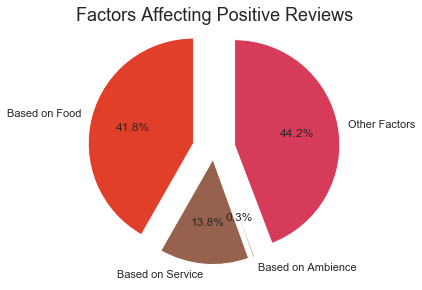

In [0]:

# Create a list of colors (from iWantHue)
colors = ["#E13F29", "#96624E","#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    pos['Values'],
    # with the labels being officer names
    labels=pos['Labels'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0.20, 0.10, .10, 0.20),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.title('Factors Affecting Positive Reviews', fontsize=18)
plt.show()

In [0]:
# negative reviews 
# based on food
neg_food = reviews_neg[(reviews_neg['text'].str.contains('food')==True) &
                      (reviews_neg['text'].str.contains('service')==False) &
                      (reviews_neg['text'].str.contains('ambience')==False)] 

# # based on ambience
neg_amb = reviews_neg[(reviews_neg['text'].str.contains('ambience')==True) &
                      (reviews_neg['text'].str.contains('service')==False) &
                      (reviews_neg['text'].str.contains('food')==False)] 

# # # based on service
neg_serv = reviews_neg[(reviews_neg['text'].str.contains('service')==True) &
                      (reviews_neg['text'].str.contains('food')==False) &
                      (reviews_neg['text'].str.contains('ambience')==False)] 

# based on others
neg_oth = reviews_neg[(reviews_neg['text'].str.contains('service')==False) &
                      (reviews_neg['text'].str.contains('food')==False) &
                      (reviews_neg['text'].str.contains('ambience')==False)] 


neg_food.shape,neg_serv.shape,neg_amb.shape

A = neg_food.shape[0]
B = neg_serv.shape[0]
C = neg_amb.shape[0]
D = neg_oth.shape[0]

data_neg = [A,B,C,D]
data_neg

d = {'Based on Food': [283],'Based on Ambience':[1],'Based on Service': [107],'Other Factors':[0]}
neg = pd.DataFrame(data=d)
neg = neg.T.reset_index()
neg = pd.DataFrame(neg)

neg=neg.rename(columns = {'index':'Labels',0:'Values'})
neg


,Labels,Values
0,Based on Food,283
1,Based on Ambience,1
2,Based on Service,107
3,Other Factors,0


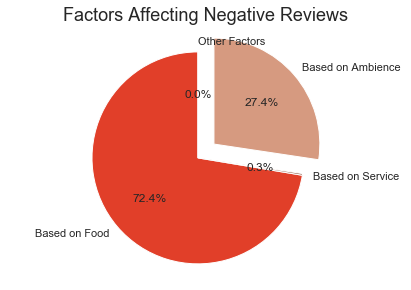

In [0]:
#Create a list of colors (from iWantHue)
colors = ["#E13F29", "#96624E","#D69A80", "#D63B59", "#AE5552", "#CB5C3B", "#EB8076", "#96624E"]

# Create a pie chart
plt.pie(
    # using data total)arrests
    neg['Values'],
    # with the labels being officer names
    labels=pos['Labels'],
    # with no shadows
    shadow=False,
    # with colors
    colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.20, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.title('Factors Affecting Negative Reviews', fontsize=18)
plt.show()